In [6]:
!pip install scikit-image

   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/12.8 MB 648.1 kB/s eta 0:00:20
    --------------------------------------- 0.2/12.8 MB 1.8 MB/s eta 0:00:07
   - -------------------------------------- 0.4/12.8 MB 2.2 MB/s eta 0:00:06
   - -------------------------------------- 0.5/12.8 MB 2.4 MB/s eta 0:00:06
   -- ------------------------------------- 0.7/12.8 MB 2.7 MB/s eta 0:00:05
   -- ------------------------------------- 0.8/12.8 MB 2.6 MB/s eta 0:00:05
   --- ------------------------------------ 1.0/12.8 MB 2.8 MB/s eta 0:00:05
   --- ------------------------------------ 1.2/12.8 MB 2.7 MB/s eta 0:00:05
   ---- ----------------------------------- 1.3/12.8 MB 2.8 MB/s eta 0:00:05
   ---- ----------------------------------- 1.5/12.8 MB 2.9 MB/s eta 0:00:04
   ----- ---------------------------------- 1.7/12.8 MB 3.1 MB/s eta 0:00:04
   ------ -


[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
# Load libraries
from skimage.graph import route_through_array
import xarray as xr
import numpy as np
from matplotlib import pyplot as plt
import os

In [8]:
# Get array index to the value that is closest to a given value
def get_closest(array, value):
    return np.abs(array - value).argmin()

## Load CMEMS wave analysis/forecast data

In [15]:
# Set file path
path = 'data\GLOBAL_ANALYSISFORECAST_WAV_001_027\cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_202311'
file_waves = os.path.join(path,'mfwamglocep_2023062312_R20230624_12H.nc')

In [16]:
print(file_waves)

data\GLOBAL_ANALYSISFORECAST_WAV_001_027\cmems_mod_glo_wav_anfc_0.083deg_PT3H-i_202311\mfwamglocep_2023062312_R20230624_12H.nc


In [17]:
# Load netCDF file into xarray
dataset_waves = xr.open_dataset(file_waves)
dataset_waves

<xarray.Dataset> Size: 3GB
Dimensions:    (time: 4, longitude: 4320, latitude: 2041)
Coordinates:
  * time       (time) datetime64[ns] 32B 2023-06-23T15:00:00 ... 2023-06-24
  * longitude  (longitude) float64 35kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float64 16kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
Data variables: (12/18)
    VHM0       (time, latitude, longitude) float32 141MB ...
    VHM0_WW    (time, latitude, longitude) float32 141MB ...
    VTM01_SW1  (time, latitude, longitude) float32 141MB ...
    VTM01_SW2  (time, latitude, longitude) float32 141MB ...
    VTM10      (time, latitude, longitude) float32 141MB ...
    VHM0_SW1   (time, latitude, longitude) float32 141MB ...
    ...         ...
    VTM01_WW   (time, latitude, longitude) float32 141MB ...
    VMDR_WW    (time, latitude, longitude) float32 141MB ...
    VMDR_SW1   (time, latitude, longitude) float32 141MB ...
    VMDR_SW2   (time, latitude, longitude) float32 141MB ...
    VMDR       (time, latitude, longitude) float32 141MB ...
    VPED       (time, latitude, longitude) float32 141MB ...
Attributes: (12/16)
    Conventions:           CF-1.6
    product:               GLOBAL_ANALYSIS_FORECAST_WAV_001_027
    institution:           METEO-FRANCE
    references:            http://marine.copernicus.eu
    credit:                E.U. Copernicus Marine Service Information (CMEMS)
    contact:               servicedesk.cmems@mercator-ocean.eu
    ...                    ...
    geospatial_lon_step:   0.08332825
    geospatial_lon_units:  degree
    geospatial_lat_min:    -80.0
    geospatial_lat_max:    90.0
    geospatial_lat_step:   0.08333588
    geospatial_lat_units:  degree

## Load CMEMS physics analysis/forecast data

In [55]:
# Set file path
path_physics = 'data\GLOBAL_ANALYSISFORECAST_PHY_001_024\cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_202406'
file_physics = os.path.join(path_physics,'glo12_rg_1d-m_20230620-20230620_3D-uovo_hcst_R20230628.nc')

In [56]:
print(file_physics)

data\GLOBAL_ANALYSISFORECAST_PHY_001_024\cmems_mod_glo_phy-cur_anfc_0.083deg_P1D-m_202406\glo12_rg_1d-m_20230620-20230620_3D-uovo_hcst_R20230628.nc


In [57]:
# Load netCDF file into xarray
dataset_physics = xr.open_dataset(file_physics)
dataset_physics

<xarray.Dataset> Size: 4GB
Dimensions:    (longitude: 4320, latitude: 2041, depth: 50, time: 1)
Coordinates:
  * longitude  (longitude) float32 17kB -180.0 -179.9 -179.8 ... 179.8 179.9
  * latitude   (latitude) float32 8kB -80.0 -79.92 -79.83 ... 89.83 89.92 90.0
  * depth      (depth) float32 200B 0.494 1.541 2.646 ... 5.275e+03 5.728e+03
  * time       (time) datetime64[ns] 8B 2023-06-20T12:00:00
Data variables:
    uo         (time, depth, latitude, longitude) float32 2GB ...
    vo         (time, depth, latitude, longitude) float32 2GB ...
Attributes:
    producer:     CMEMS - Global Monitoring and Forecasting Centre
    title:        daily mean fields from Global Ocean Physics Analysis and Fo...
    area:         Global
    Conventions:  CF-1.8
    credit:       E.U. Copernicus Marine Service Information (CMEMS)
    contact:      https://marine.copernicus.eu/contact
    references:   http://marine.copernicus.eu
    source:       MOI GLO12
    licence:      http://marine.copernicus.eu/services-portfolio/service-comm...
    institution:  Mercator Ocean International


## Define routing problem
Calculate the optimal shipping route between New York and Lisbon avoiding high waves.

New York: 40.7128° N, 74.0060° W
Lisbon: 38.7223° N, 9.1393° W


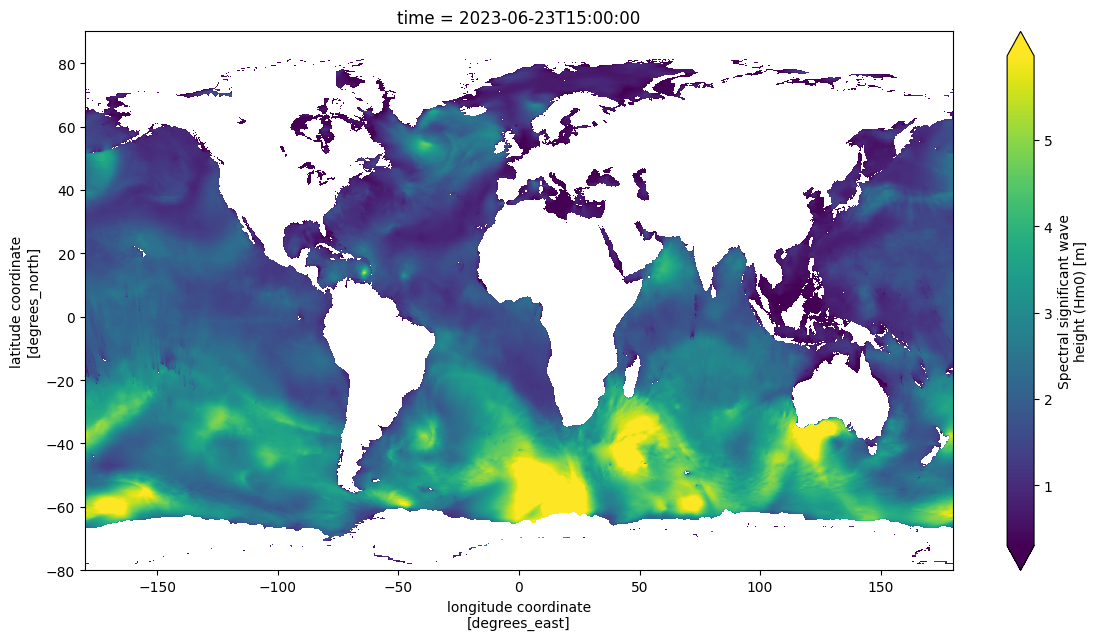

In [21]:
# Plot Wave Height variable in the dataset for a specific time slice
dataset_waves.VHM0.isel(time=0).plot(robust=True, aspect=2, size=7);

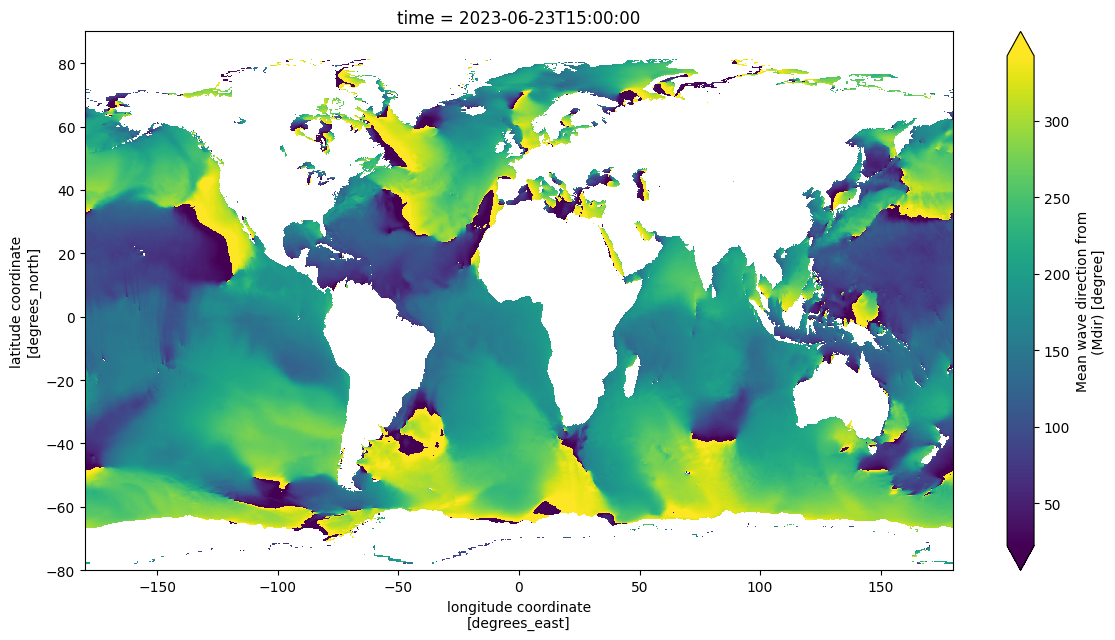

In [22]:
# Plot Mean Wave Direction variable in the dataset for a specific time slice
dataset_waves.VMDR.isel(time=0).plot(robust=True, aspect=2, size=7);

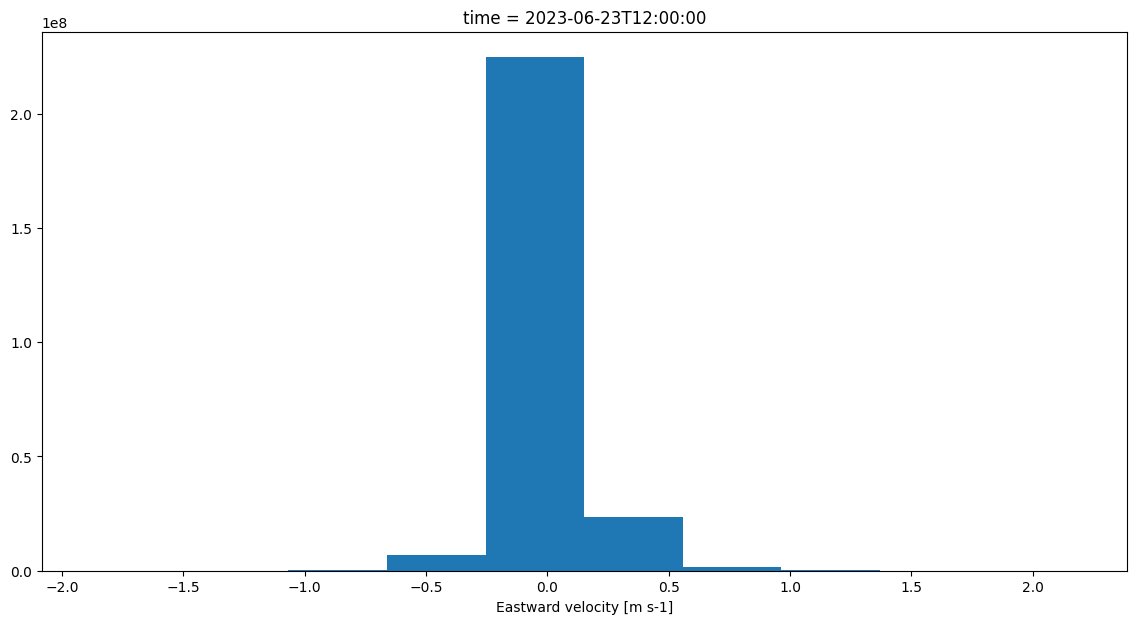

In [26]:
# Plot Mixed layer thickness variable in the dataset for a specific time slice
dataset_physics.uo.isel(time=0).plot(aspect=2, size=7);

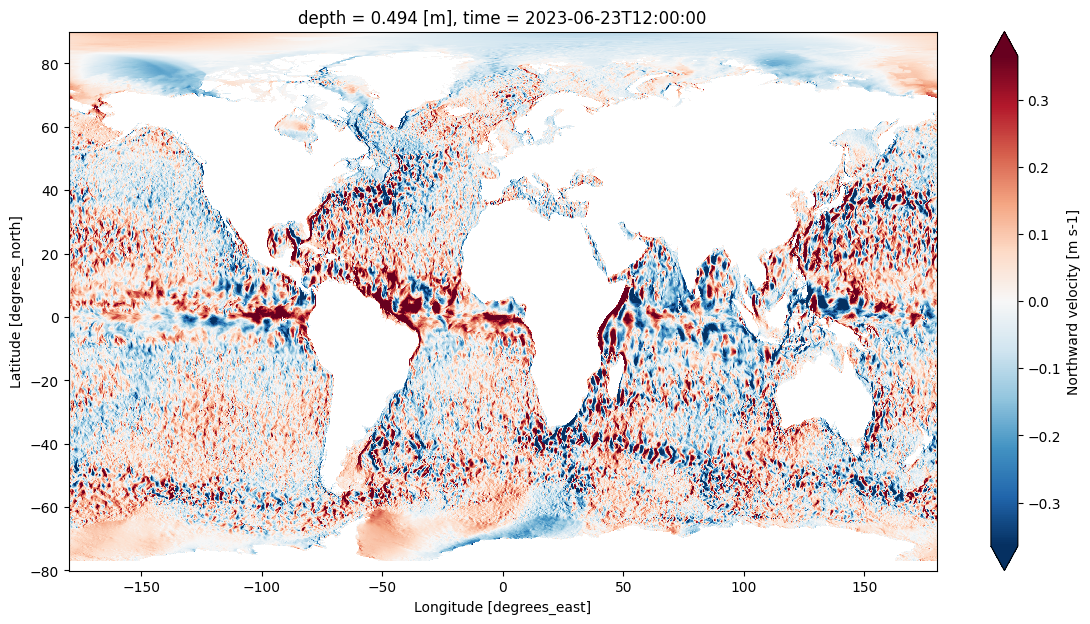

In [25]:
# Plot sea surface temperature variable in the dataset for a specific time slice
dataset_physics.vo.isel(time=0, depth=0).plot(robust=True, aspect=2, size=7);

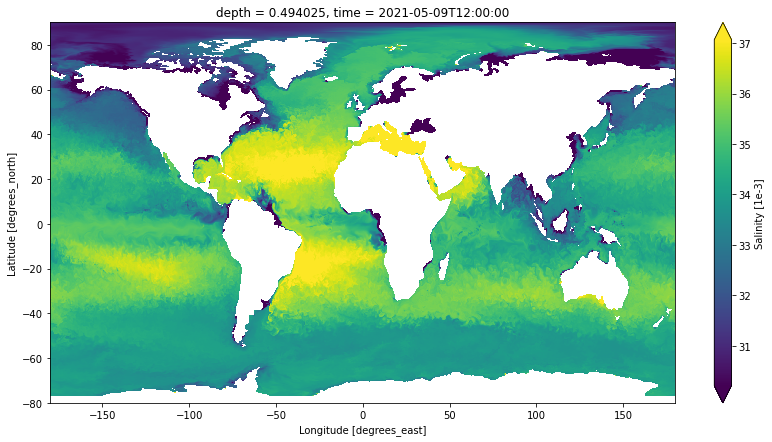

In [58]:
# Plot sea surface temperature variable in the dataset for a specific time slice
dataset_physics.so.isel(time=0, depth=0).plot(robust=True, aspect=2, size=7);

## Define area of interest

In [27]:
# Set bounding box for the allowed routing corridor
bbox = ((-80, 32),(-5, 47))
# Select time
time_slice = 0

In [28]:
# Get indices of the bbox
lon_min = get_closest(dataset_waves.longitude.data, bbox[0][0])
lat_min = get_closest(dataset_waves.latitude.data, bbox[0][1])
lon_max = get_closest(dataset_waves.longitude.data, bbox[1][0])
lat_max = get_closest(dataset_waves.latitude.data, bbox[1][1])

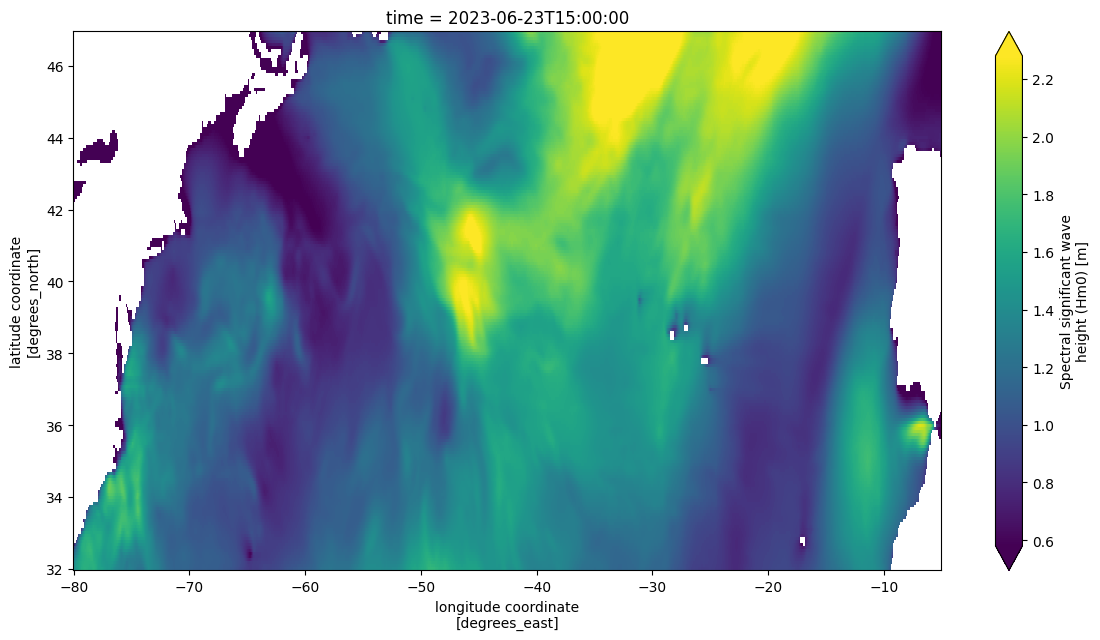

In [29]:
# Extract array  of wave height from dataset_waves to define the cost in the routing algorithm 
# -> subset space, time and variable
wave_height = dataset_waves.VHM0.isel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
wave_height.plot(robust=True, aspect=2, size=7);

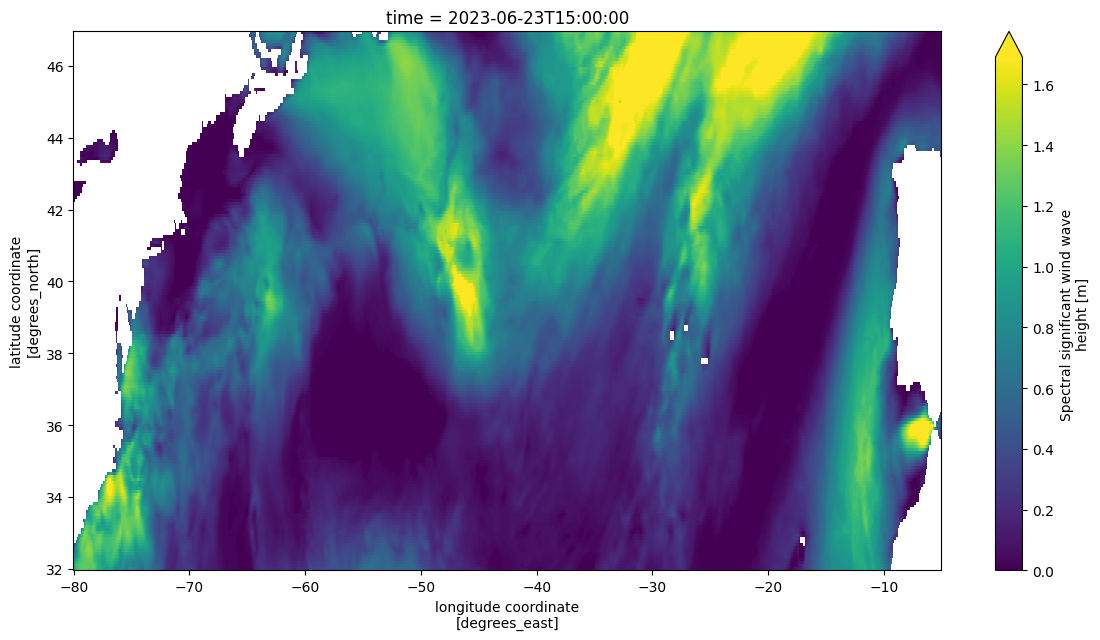

In [30]:
# Extract array of wind wave height from dataset_waves to define the cost in the routing algorithm 
# -> subset space, time and variable
wind_wave_height = dataset_waves.VHM0_WW.isel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
wind_wave_height.plot(robust=True, aspect=2, size=7);

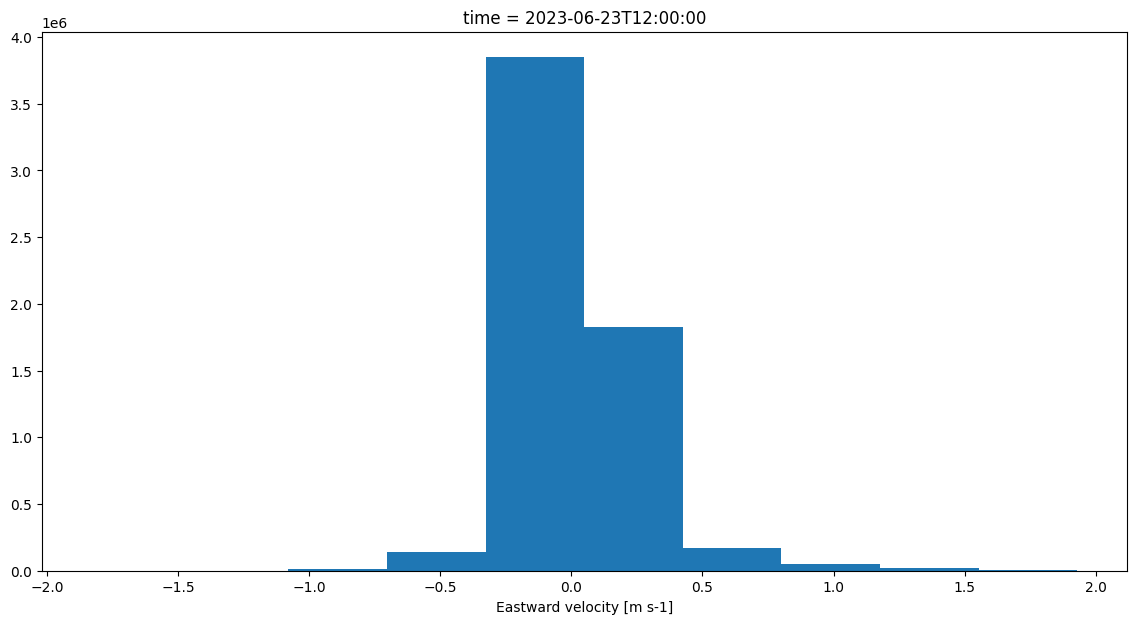

In [32]:
# Extract array of mixed layer thickness from dataset_waves to define the cost in the routing algorithm 
# -> subset space, time and variable
sea_mixed_layer_thick = dataset_physics.uo.isel(time=time_slice, longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
sea_mixed_layer_thick.plot(aspect=2, size=7);

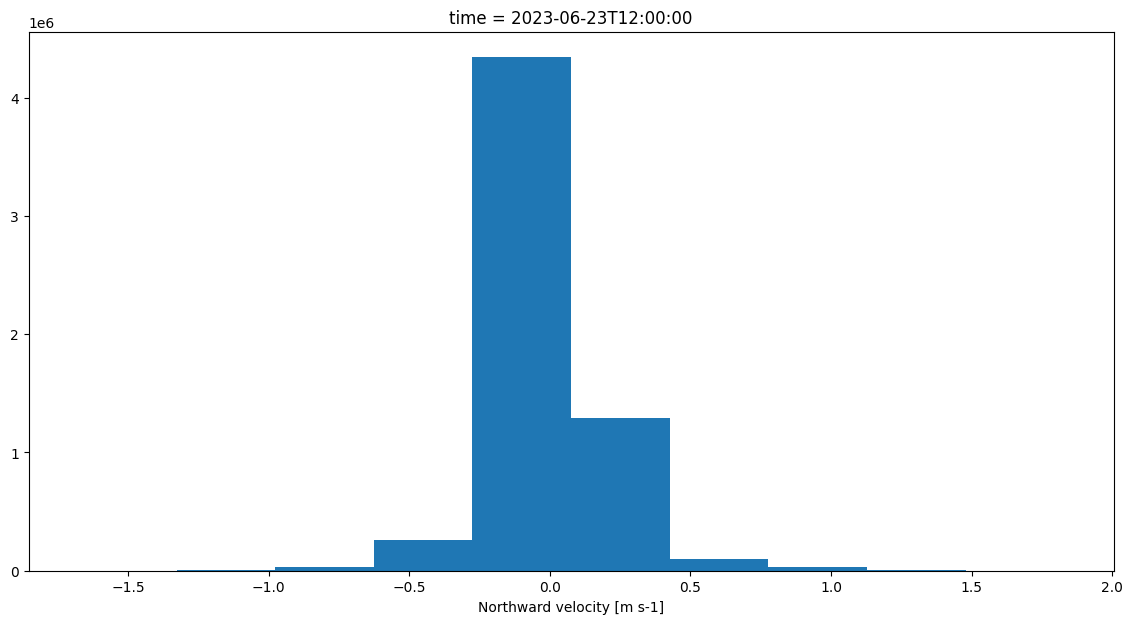

In [34]:
# Extract array of sea mixed layer thickness from dataset_waves to define the cost in the routing algorithm 
# -> subset space, time and variable
sea_mixed_layer_thick = dataset_physics.vo.isel(time=time_slice,longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
sea_mixed_layer_thick.plot( aspect=2, size=7);

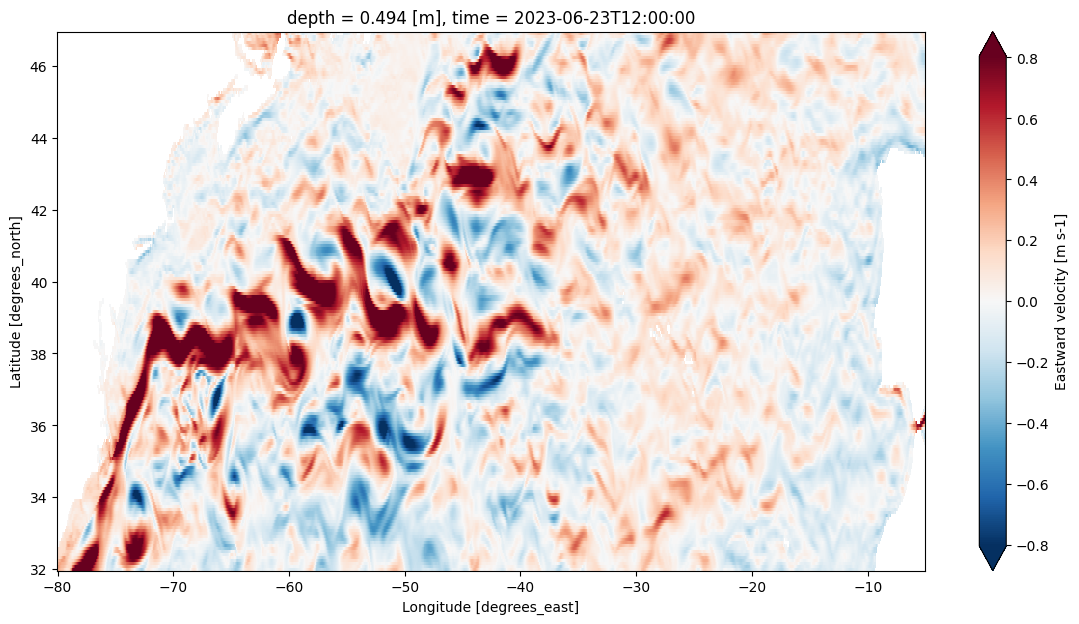

In [35]:
# Extract array of sea water sainity from dataset_waves to define the cost in the routing algorithm 
# -> subset space, time and variable
sea_water_salinity = dataset_physics.uo.isel(time=time_slice, depth=0 ,longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
sea_water_salinity.plot(robust=True, aspect=2, size=7);

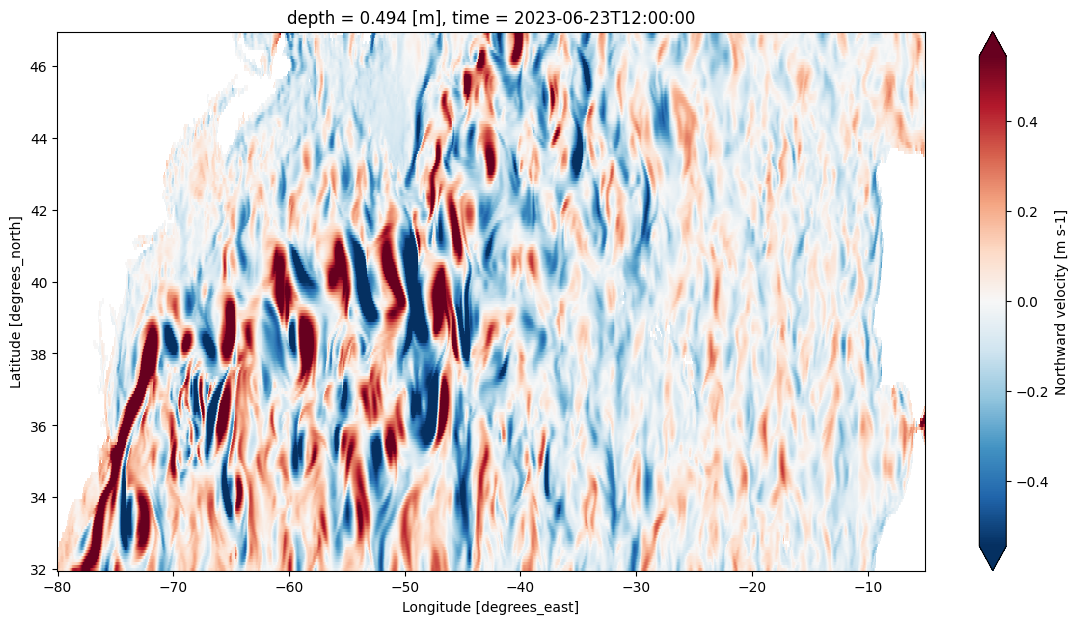

In [36]:
# Extract array of sea water temperature from dataset_waves to define the cost in the routing algorithm 
# -> subset space, time and variable
sea_water_temperature = dataset_physics.vo.isel(time=time_slice, depth=0 ,longitude=slice(lon_min, lon_max), latitude=slice(lat_min, lat_max))
sea_water_temperature.plot(robust=True, aspect=2, size=7);

In [51]:
costs = wave_height.data + wind_wave_height.data + sea_mixed_layer_thick.data + sea_water_salinity.data + sea_water_temperature.data
# Set NaN values to large costs as the algorithm cannot handle NaNs
costs[np.isnan(costs)] = 2 * np.nanmax(costs) 
np.shape(costs)

(50, 180, 900)


## Define start/end point of route

In [48]:
lat_NY = 40.7128
lon_NY = -74.0060
lat_LS = 38.7223
lon_LS = -9.1393

In [49]:
start_lon = get_closest(wave_height.longitude.data, lon_NY)
start_lat = get_closest(wave_height.latitude.data, lat_NY)
end_lon = get_closest(wave_height.longitude.data,lon_LS)
end_lat = get_closest(wave_height.latitude.data,lat_LS)

In [50]:
start = (start_lat, start_lon)
end = (end_lat, end_lon)
start,end

((105, 72), (81, 850))

## Calculate optimal route (minimum cost path)
Calculate optimal route based on the minimum cost path


In [46]:
# Optional parameters:
# - fully_connected 
#     - False -> only axial moves are allowed
#     - True  -> diagonal moves are allowed
# - geometric 
#     - False -> minimum cost path
#     - True  -> distance-weighted minimum cost path

indices, weight = route_through_array(costs, start, end, fully_connected=False, geometric=True)
indices = np.stack(indices, axis=-1)
indices

ValueError: start points must all be within the costs array

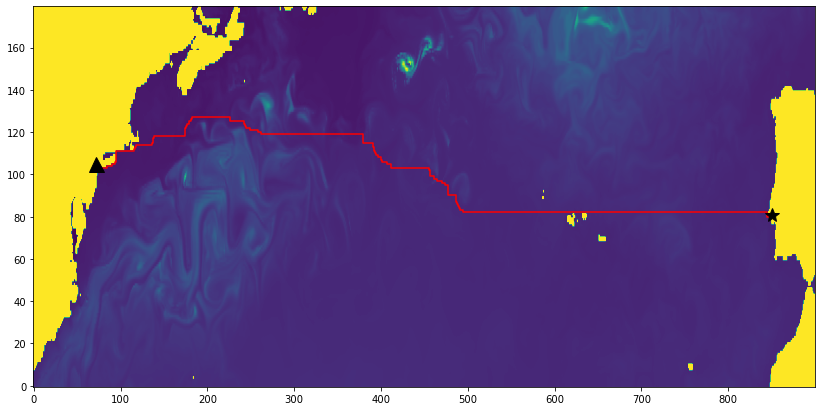

In [78]:
# Plot optimal route

plt.figure(figsize=(14,7))
# Costs
plt.imshow(costs, aspect='auto', vmin=np.min(costs), vmax=0.5*np.max(costs));
# Route
plt.plot(indices[1],indices[0], 'r')
# Start/end points
plt.plot(start_lon, start_lat, 'k^', markersize=15)
plt.plot(end_lon, end_lat, 'k*', markersize=15)
plt.gca().invert_yaxis();